# Upload Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv("Cars93.csv")

# Reading Dataset

In [3]:
data.head(15)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [4]:
data.shape

(93, 28)

In [5]:
data['Origin'].value_counts()

USA        48
non-USA    45
Name: Origin, dtype: int64

In [6]:
data.describe()

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,47.000000,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,26.990739,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,1.000000,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,24.000000,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,47.000000,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,70.000000,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,93.000000,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


### Check if there is any Null values

In [7]:
data.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

<AxesSubplot:>

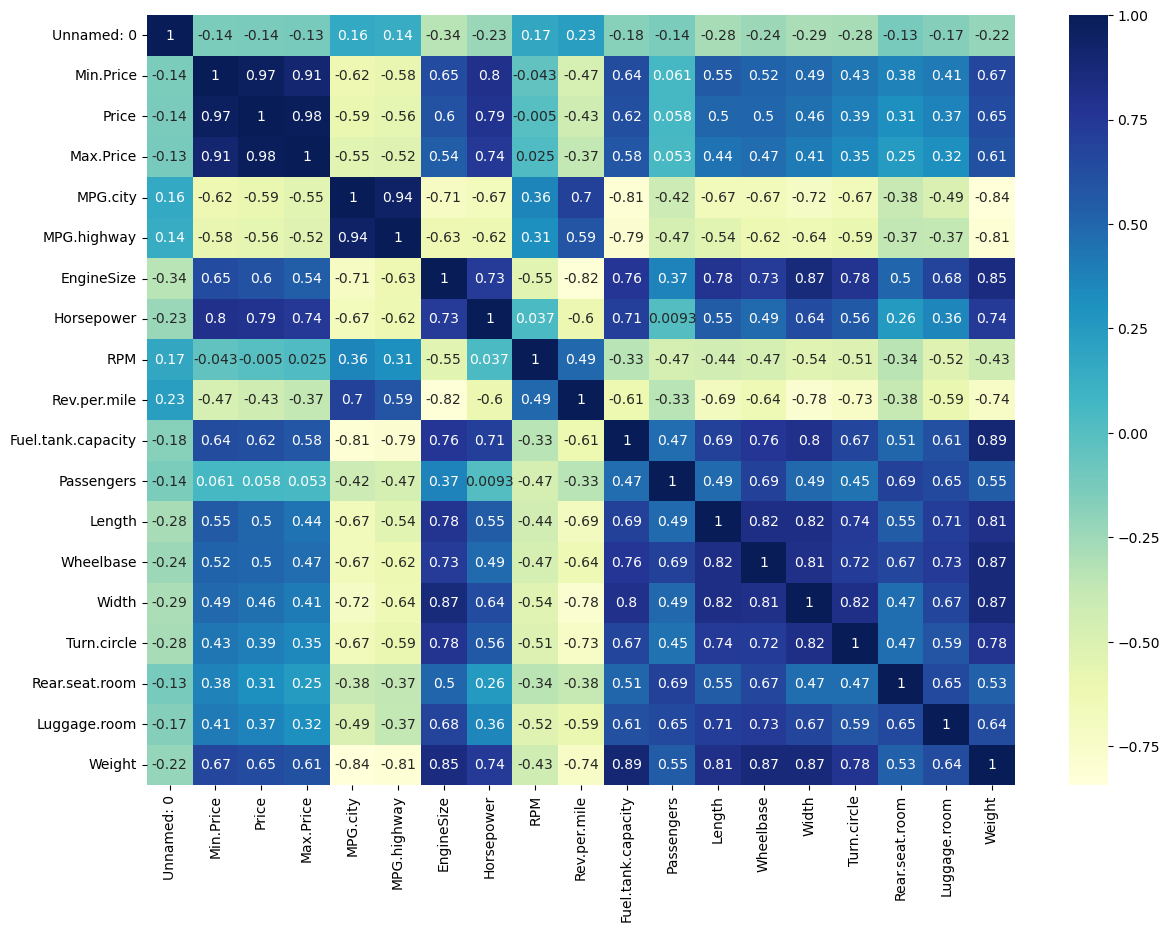

In [8]:
plt.figure(figsize= (14,10))
sns.heatmap(data.corr(),annot = True , cmap = "YlGnBu")

### from above plot we can see the relations between features and target, thus we can decide which feature to drop if it got close to zero

In [9]:
data = data.drop(['Unnamed: 0'], axis=1)

#### found null values in rear.seat.room and Luggage.room features 

In [10]:
data['Rear.seat.room'].value_counts()

26.5    9
28.0    9
27.5    8
30.5    8
26.0    8
30.0    6
25.0    5
28.5    5
27.0    5
31.0    4
31.5    3
29.5    3
23.5    3
35.0    2
24.0    2
23.0    2
24.5    2
25.5    1
19.0    1
36.0    1
29.0    1
20.0    1
33.5    1
34.0    1
Name: Rear.seat.room, dtype: int64

In [11]:
data['Rear.seat.room'].fillna(method ='ffill', inplace = True)

In [12]:
data.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         0
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [13]:
data['Luggage.room'].value_counts()

14.0    18
15.0    10
13.0     9
11.0     8
12.0     8
16.0     6
17.0     5
18.0     4
10.0     4
21.0     2
8.0      2
9.0      2
20.0     1
19.0     1
22.0     1
6.0      1
Name: Luggage.room, dtype: int64

In [14]:
data['Luggage.room'].fillna(method ='ffill', inplace = True)

In [15]:
data.isnull().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

# Encoding

### At this stage we start converting any object feature to a numeric one to be suitable for the modeling stage

### We will use labelEncoding method

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
data['Manufacturer'] = le.fit_transform(data['Manufacturer'])
data['Model'] = le.fit_transform(data['Model'])
data['Type'] = le.fit_transform(data['Type'])
data['AirBags'] = le.fit_transform(data['AirBags'])
data['DriveTrain'] = le.fit_transform(data['DriveTrain'])
data['Origin'] = le.fit_transform(data['Origin'])
data['Make'] = le.fit_transform(data['Make'])
data['Man.trans.avail'] = le.fit_transform(data['Man.trans.avail'])


#### Checking if all the dataset are converted

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     int32  
 1   Model               93 non-null     int32  
 2   Type                93 non-null     int32  
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     int32  
 9   DriveTrain          93 non-null     int32  
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     int32  
 16  Fuel.tank.

### "Cylinders" still an object feature          

In [20]:
data['Cylinders'].value_counts()

4         49
6         31
8          7
3          3
5          2
rotary     1
Name: Cylinders, dtype: int64

### we need to drop this one unnecessary row (rotary) to be able to convert it     

In [21]:
drops = data[ (data['Cylinders'] == 'rotary') ].index
data.drop(drops , inplace=True)
data.shape

(92, 27)

### Now we can convert it 

In [22]:
data['Cylinders'] = data['Cylinders'].astype(str).astype(int)

### Checking again...

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        92 non-null     int32  
 1   Model               92 non-null     int32  
 2   Type                92 non-null     int32  
 3   Min.Price           92 non-null     float64
 4   Price               92 non-null     float64
 5   Max.Price           92 non-null     float64
 6   MPG.city            92 non-null     int64  
 7   MPG.highway         92 non-null     int64  
 8   AirBags             92 non-null     int32  
 9   DriveTrain          92 non-null     int32  
 10  Cylinders           92 non-null     int32  
 11  EngineSize          92 non-null     float64
 12  Horsepower          92 non-null     int64  
 13  RPM                 92 non-null     int64  
 14  Rev.per.mile        92 non-null     int64  
 15  Man.trans.avail     92 non-null     int32  
 16  Fuel.tank.

# Features Separating 

In [26]:
x = data.drop(['Origin'], axis=1)
y = data['Origin']

#### X contains the expected target values we need to predict later

#### Y contains the target values

# Splitting the Dataset 🪓

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

### we split the data 75% to train on and 25% to test on

# Modeling with Decision tree

### Start fitting the training and testing data to the model 

### Then saving the model predictions to a variable to compare it later

In [29]:
DT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DT.fit(x_train, y_train)
y_pred_DT = DT.predict(x_test)

In [30]:
from sklearn import tree

### Printing visualization

In [31]:
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_14 <= 1859.80
|   |--- class: 0
|--- feature_14 >  1859.80
|   |--- feature_25 <= 72.75
|   |   |--- feature_4 <= 25.44
|   |   |   |--- feature_13 <= 5070.58
|   |   |   |   |--- class: 0
|   |   |   |--- feature_13 >  5070.58
|   |   |   |   |--- feature_1 <= 40.02
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  40.02
|   |   |   |   |   |--- class: 1
|   |   |--- feature_4 >  25.44
|   |   |   |--- class: 1
|   |--- feature_25 >  72.75
|   |   |--- feature_23 <= 11.26
|   |   |   |--- class: 1
|   |   |--- feature_23 >  11.26
|   |   |   |--- feature_0 <= 28.93
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  28.93
|   |   |   |   |--- class: 1



### Applying PlotTree

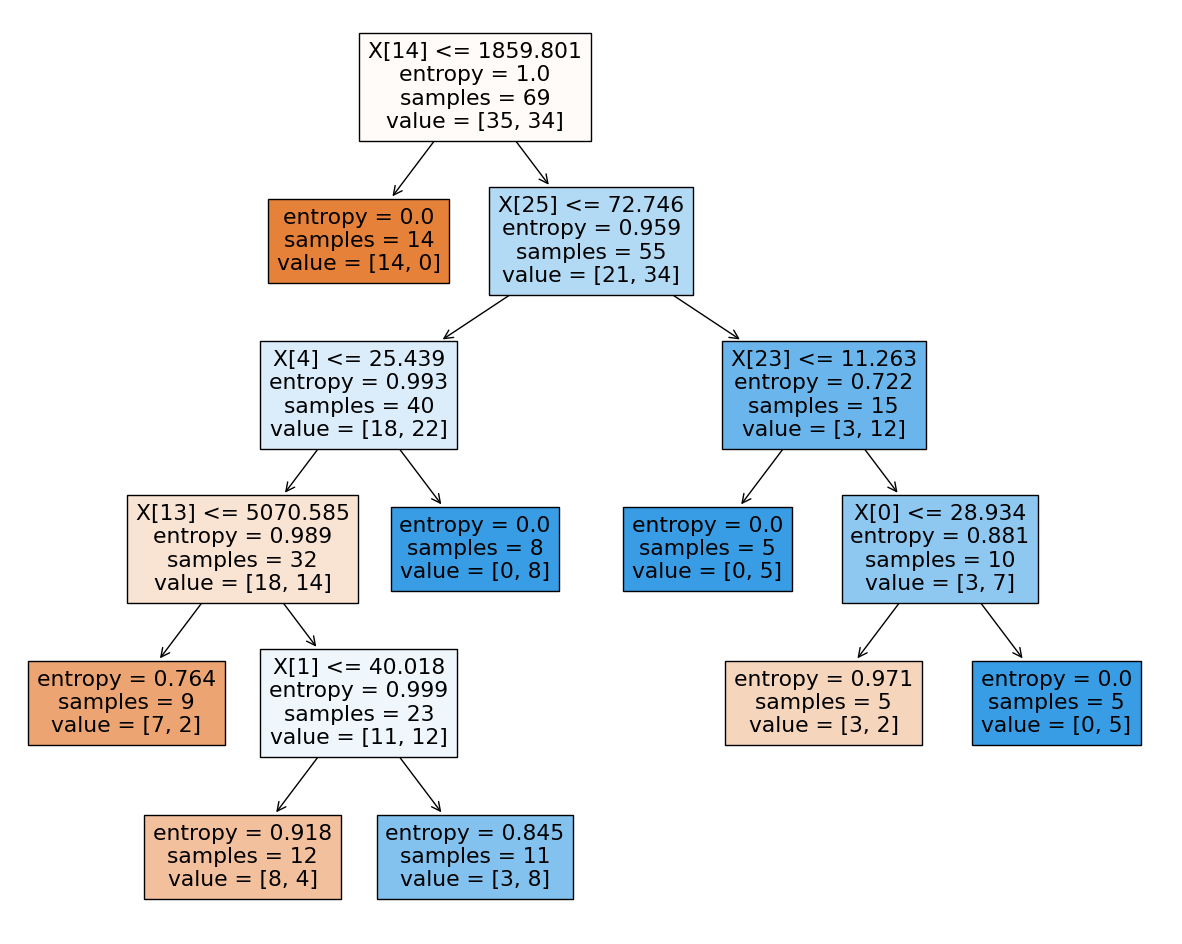

In [32]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT , filled=True);

### Comparing the actual data with the predicting

In [33]:
d = pd.DataFrame({"Y_TEST":y_test,"Y_Pred": y_pred_DT})
d

,Y_TEST,Y_Pred
13,0,0
69,0,0
35,0,0
10,0,1
53,1,1
81,1,0
47,1,1
90,1,1
63,1,1
14,0,1


In [34]:
DTAcc = DT.score(x_train,y_train)

# logistical regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(x_train , y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
LRAcc= lr.score(x_train , y_train)

### Create Accuracy Comparison Table

In [39]:
compare = pd.DataFrame({'Model': ['Decision Tree','LogisticRegression'],  
                        'Accuracy': [ DTAcc*100, LRAcc*100]})

compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

C:\Users\zee52\AppData\Local\Temp\ipykernel_10028\191893920.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})


Model,Accuracy
LogisticRegression,86.956522
Decision Tree,84.057971
